In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_excel("Airlines+Data.xlsx",header = 0, index_col = 0, parse_dates = True)

In [124]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


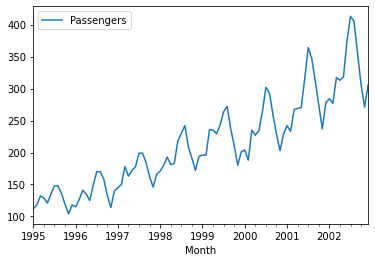

In [125]:
df.plot()
plt.show()

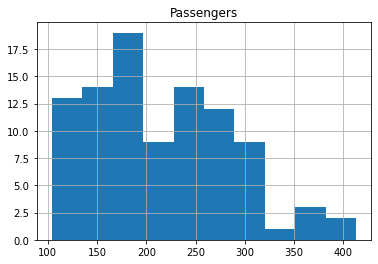

In [126]:
df.hist()
plt.show()

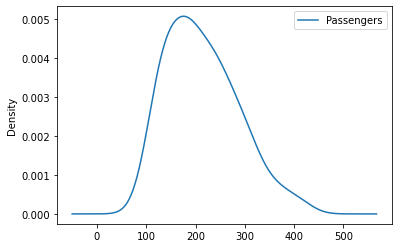

In [127]:
df.plot(kind='kde')
plt.show()

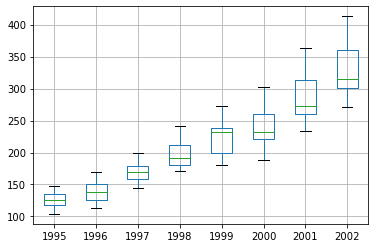

In [129]:
from pandas import Grouper
df = pd.read_excel("Airlines+Data.xlsx",header = 0, index_col = 0, parse_dates = True,squeeze=True)
groups = df.groupby(Grouper(freq = 'A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

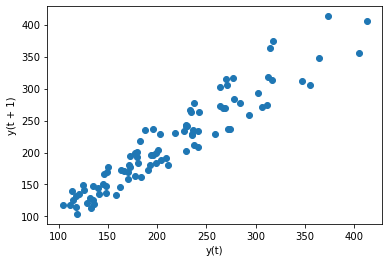

In [130]:
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

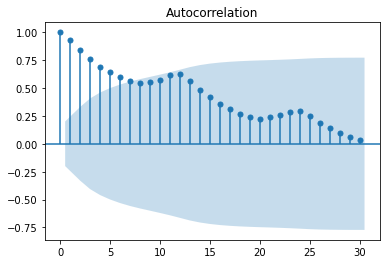

In [131]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags = 30)
plt.show()

<AxesSubplot:xlabel='Passengers'>

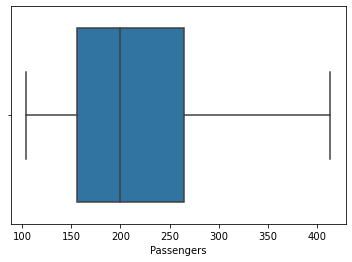

In [132]:
# Boxplot for ever
df=pd.DataFrame(df)
sns.boxplot("Passengers",data=df)

In [133]:
Train = df.head(84)
Test = df.tail(12)

In [134]:
Train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2001-08-01,347
2001-09-01,312
2001-10-01,274


In [135]:
Test

,Passengers
Month,
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318
2002-06-01,374
2002-07-01,413
2002-08-01,405
2002-09-01,355


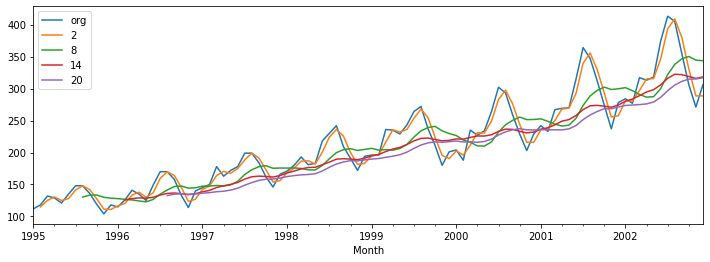

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
df['Passengers'].plot(label='org')
for i in range(2,24,6):
    df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc = 'best')

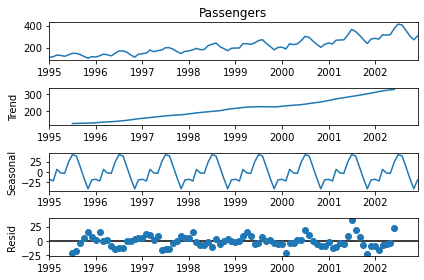

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

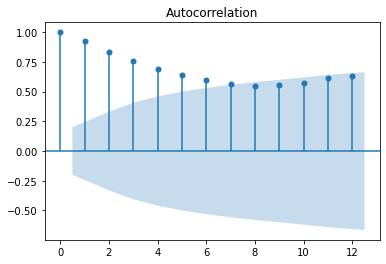

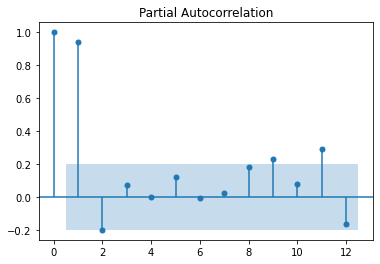

In [138]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df['Passengers'], lags = 12)
tsa_plots.plot_pacf(df['Passengers'], lags = 12)
plt.show

In [139]:
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

In [140]:
def rmse(pred):
    rmse = np.sqrt(np.mean((np.array(Test['Passengers'])- np.array(pred))**2))
    return rmse

In [141]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [144]:
# Simple Exponential Method
import warnings
ses_model = SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
print('MAPE Value for the Simple Exponential Model is:',MAPE(pred_ses, Test["Passengers"]))
print('rmse value for the model is:',rmse(pred_ses))
Train=pd.DataFrame(Train)
Train.columns

MAPE Value for the Simple Exponential Model is: 13.41127474051367
rmse value for the model is: 64.84476396990442


Index(['Passengers'], dtype='object')

In [145]:
# Holt's Method
hw_model = Holt(Train['Passengers']).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
print('The MAPE value for the Holt model is:', MAPE(pred_hw, Test['Passengers']))
print('The rmse value for the model is:', rmse(pred_hw))

The MAPE value for the Holt model is: 23.530719652100505
The rmse value for the model is: 95.76674452675243


In [147]:
# Holt's WInter Exponential Smoothing with Multiplicative Seasonality and Additive Trend
hw_model_mul_add = ExponentialSmoothing(Train['Passengers'], seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()
pred_hw_mul_add = hw_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
print('The MAPE value for the model is :', MAPE(pred_hw_mul_add, Test['Passengers']))
print('The rmse value for the model is :', rmse(pred_hw_mul_add))

The MAPE value for the model is : 2.820815894720633
The rmse value for the model is : 12.920117389456681


In [149]:
hwe_model_add_add = ExponentialSmoothing(df['Passengers'], seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()

In [150]:
hwe_model_add_add.forecast(10)

2003-01-01    319.235281
2003-02-01    311.528396
2003-03-01    350.278697
2003-04-01    346.984962
2003-05-01    351.845000
2003-06-01    403.925721
2003-07-01    440.566848
2003-08-01    427.446585
2003-09-01    376.628288
2003-10-01    329.767602
Freq: MS, dtype: float64